# Decision Trees 

In [2]:
# implementing the tree using scikit learn
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import mean_squared_error
#import matplotlib.pyplot as plt
#import seaborn as sns
df = pd.read_csv("UA_clean_data.csv")
df.columns

Index(['Unnamed: 0', 'total_arrival_flights', 'carrier_delay_mins',
       'weather_delay_mins', 'nas_delay_mins', 'security_delay_mins',
       'lateaircraft_delay_mins', 'AGS', 'ALB', 'ANC',
       ...
       'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014',
       'year_2015', 'year_2016', 'year_2017', 'year_2018', 'year_2019'],
      dtype='object', length=163)

In [5]:
df = df.drop(columns = ['Unnamed: 0'])

In [6]:
df.head()

,total_arrival_flights,carrier_delay_mins,weather_delay_mins,nas_delay_mins,security_delay_mins,lateaircraft_delay_mins,AGS,ALB,ANC,ATL,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
0,150.0,349.0,266.0,105.0,0.0,696.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90.0,71.0,0.0,130.0,0.0,451.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,130.0,343.0,47.0,426.0,0.0,233.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,365.0,461.0,240.0,1643.0,0.0,1591.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,60.0,93.0,56.0,219.0,0.0,59.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#creating matrix of features 
X = df.drop('target_delayed', axis = 1)

#assigning target variable 
y = df['target_delayed']

#creating a list of features
feature_cols = X.columns

In [8]:
# splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [17]:
regTree = DecisionTreeRegressor(max_depth=3)
# fit the tree
regTree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

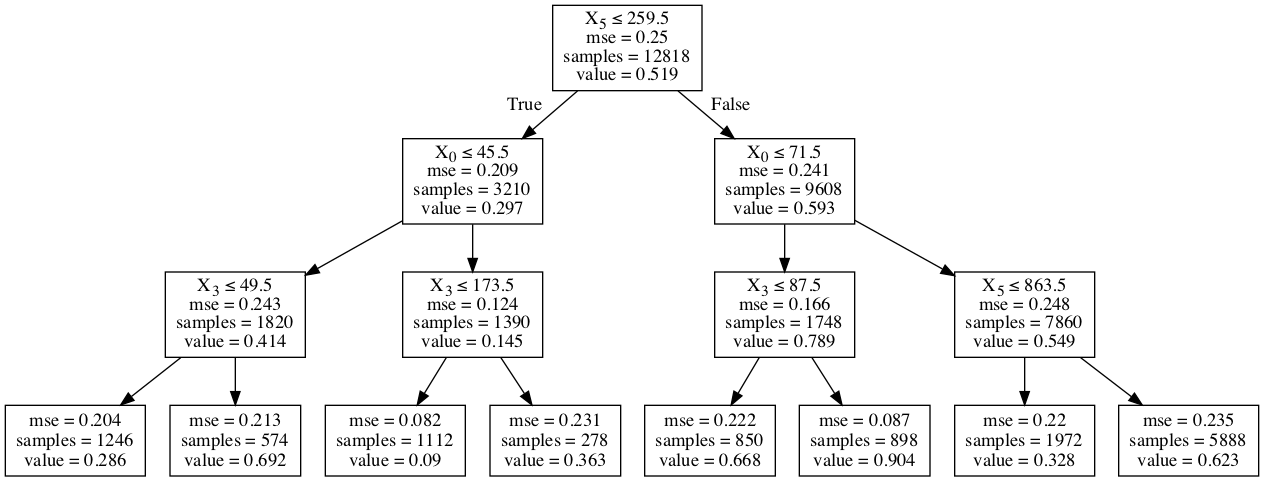

In [18]:
# visualizing the regression tree
dot_data = StringIO()
export_graphviz(regTree, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [19]:
# use the model to predict the testing and compare mse
regPred = regTree.predict(X_test)

In [20]:
# comparing the results and plot them 
mse = mean_squared_error(regPred, y_test)
mse

0.2112247982473041

# Classification Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
ctree=DecisionTreeClassifier(max_depth = 5)
ctree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

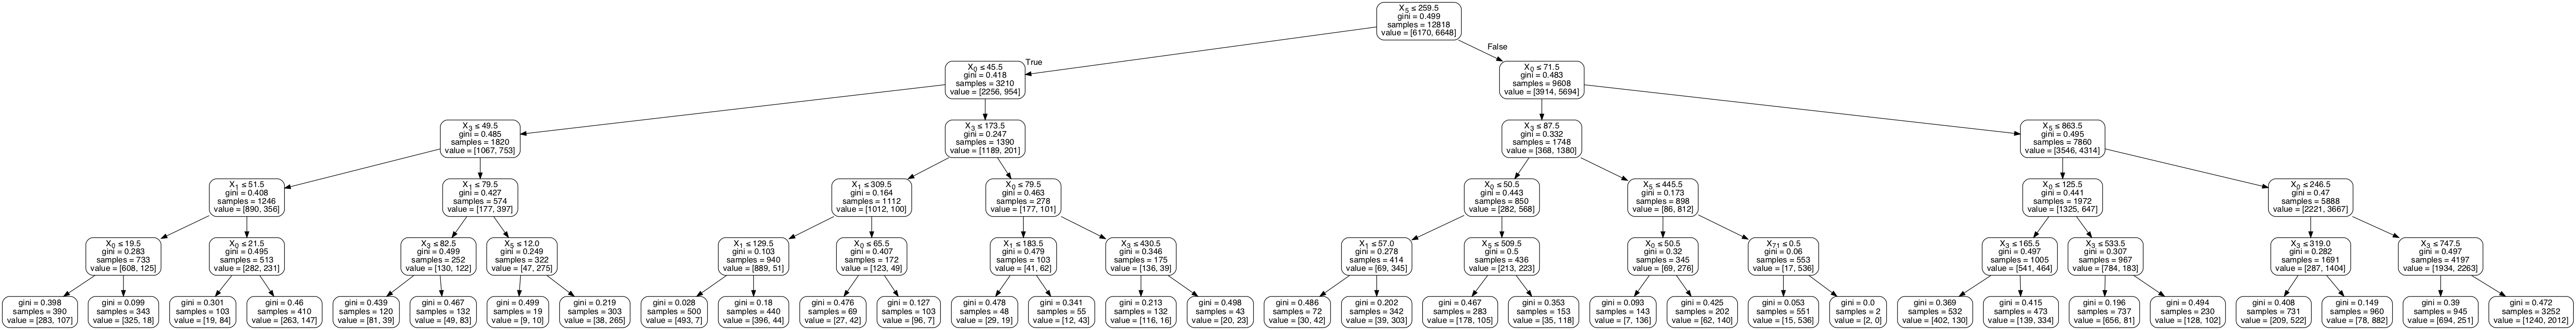

In [32]:
dot_data = StringIO()
export_graphviz(ctree, out_file=dot_data,  
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [33]:
clasPred = ctree.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clasPred)

0.7438377535101404

[0.6077523183357048, 0.5322217315691631, 0.5437642279651993, 0.5727905230751018, 0.6141047957053061, 0.6208452783988823, 0.6325827120341619, 0.6437520784608759, 0.6622237253339751]


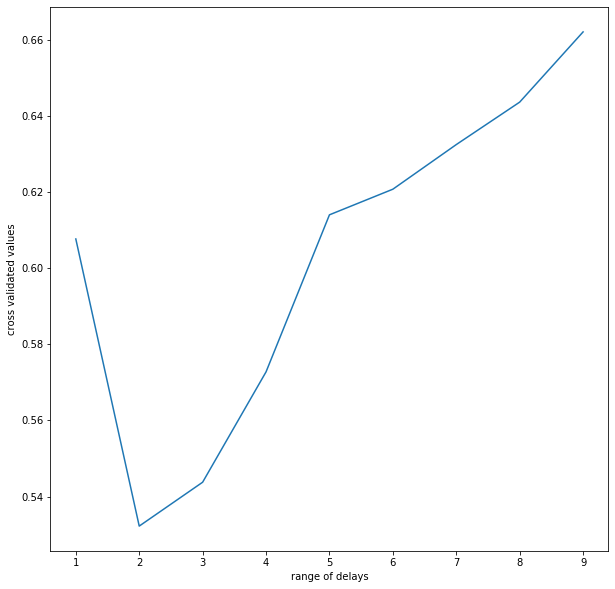

In [35]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(ctree, X, y, cv = 10)
score.mean()
depth_range = range(1,10)
val = []
for depth in depth_range:
    ctree = DecisionTreeClassifier(max_depth = depth)
    depth_score = cross_val_score(ctree, X, y, cv = 10)
    val.append(depth_score.mean())
print(val)
plt.figure(figsize = (10,10))
plt.plot(depth_range, val)
plt.xlabel('range of delays')
plt.ylabel('cross validated values')
plt.show()